# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></div><div class="lev1 toc-item"><a href="#Load-and-Inspect-the-Data" data-toc-modified-id="Load-and-Inspect-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Inspect the Data</a></div><div class="lev1 toc-item"><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></div><div class="lev1 toc-item"><a href="#Manual-Implementation" data-toc-modified-id="Manual-Implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manual Implementation</a></div><div class="lev2 toc-item"><a href="#Algorithm" data-toc-modified-id="Algorithm-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithm</a></div><div class="lev2 toc-item"><a href="#Compare-different-numbers-of-iterations" data-toc-modified-id="Compare-different-numbers-of-iterations-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Compare different numbers of iterations</a></div><div class="lev2 toc-item"><a href="#Analysis-of-parameters" data-toc-modified-id="Analysis-of-parameters-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis of parameters</a></div><div class="lev2 toc-item"><a href="#Analysis-of-Convergence" data-toc-modified-id="Analysis-of-Convergence-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Analysis of Convergence</a></div><div class="lev1 toc-item"><a href="#Library-Implementations" data-toc-modified-id="Library-Implementations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Library Implementations</a></div><div class="lev2 toc-item"><a href="#Statsmodel" data-toc-modified-id="Statsmodel-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Statsmodel</a></div><div class="lev2 toc-item"><a href="#SKLearn" data-toc-modified-id="SKLearn-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SKLearn</a></div><div class="lev2 toc-item"><a href="#SciPy" data-toc-modified-id="SciPy-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>SciPy</a></div>

# Purpose
For testing a handmade linear regression algoritm, use a simple dataset with only a few datapoints, so one can understand the results of every iteration. 

See [UniVariate Linear Regression](01 - LinearRegression - UniVariate.ipynb) for introduction, data analysis and more interesting version.

*Simple*: a nearly linear correlation

*Anti*: a nearly linear anti correlation

# Load and Inspect the Data

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
df_simple = pd.read_csv('./data/simple.csv')
df_anti = pd.read_csv('./data/simple-anti.csv')

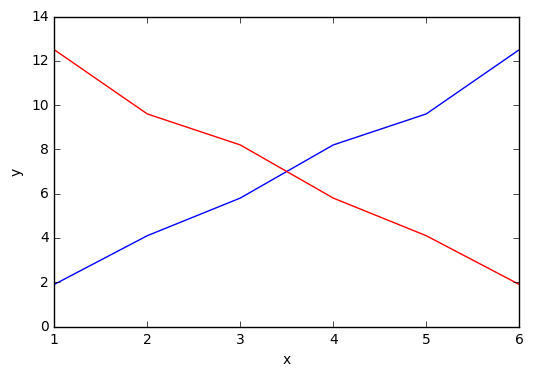

In [5]:
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
plot(df_simple["x"], df_simple["y"], c='b')
xlabel("x")
ylabel("y")
plot(df_anti["x"], df_anti["y"], c='r')

# Data Preparation

In [6]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace

# Xs
X_simple = df_simple["x"]
X_anti = df_anti["x"]
# Y
y_simple = df_simple["y"]
y_anti = df_anti["y"]

#number of training samples
m = y_simple.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X_simple
X_simple = it
it = ones(shape=(m, 2))
it[:, 1] = X_anti
X_anti = it

# Manual Implementation

## Algorithm

In [8]:
def compute_cost(X, y, theta):
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = zeros(shape=(num_iters, 1))
    
    last_cost = compute_cost(X, y, theta)
    
    for i in range(num_iters):
        predictions = X.dot(theta).flatten()
        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]        
        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()            
        cost = compute_cost(X, y, theta)
        if cost > last_cost:
            print("\tfound lowest cost before end of iterations")
            print("\titeration: " + str(i))
            print("\tbefore:" + str(last_cost))
            print("\tnow:" + str(cost))
            break
        J_history[i, 0] = cost
    return theta, J_history

## Compare different numbers of iterations

In [34]:
alphas = ["0.001", "0.005", "0.01"]
iterations = ["1", "5", "10", "100", "1000", "10000"]

theta = {}
theta["simple"] = {}
theta["anti"] = {}
J_history = {}
J_history["simple"] = {}
J_history["anti"] = {}

for alpha in alphas:
    for iteration in iterations:
        if not iteration in theta["simple"]:
            theta["simple"][iteration] = {}
            J_history["simple"][iteration] = {}
            theta["anti"][iteration] = {}
            J_history["anti"][iteration] = {}
        theta["simple"][iteration][alpha] = zeros(shape=(2, 1))
        theta["simple"][iteration][alpha], J_history["simple"][iteration][alpha] = gradient_descent(X_simple, y_simple, theta["simple"][iteration][alpha], float(alpha), int(iteration))
        theta["anti"][iteration][alpha] = zeros(shape=(2, 1))
        theta["anti"][iteration][alpha], J_history["anti"][iteration][alpha] = gradient_descent(X_anti, y_anti, theta["anti"][iteration][alpha], float(alpha), int(iteration))
        print('.', end='')
    print('-')


......-
......-
......-


## Analysis of parameters

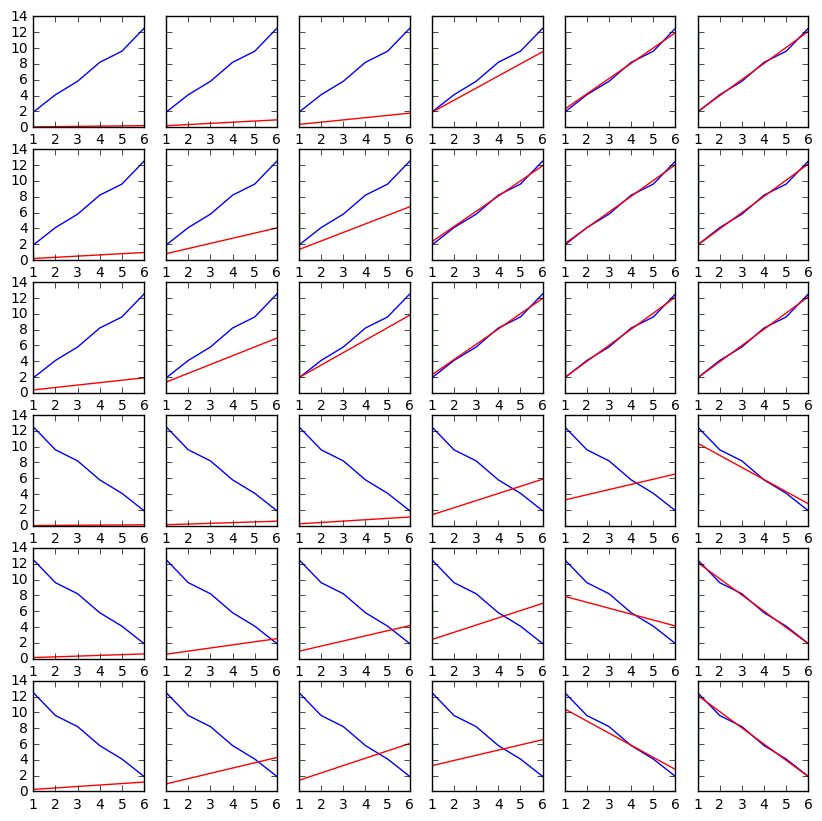

In [45]:
plt.close('all')
f, axarr = plt.subplots(len(alphas)*2, len(iterations), sharey=True)
f.set_size_inches(10,10)

i = 0
j = 0
for alpha in alphas:
    for iteration in iterations:
        result_simple = X_simple.dot(theta["simple"][iteration][alpha]).flatten()
        axarr[i, j].plot(df_simple["x"], df_simple["y"])
        axarr[i, j].plot(X_simple, result_simple, label=str(iteration) + "-" + str(alpha))
        j+=1
    i+=1
    j= 0

for alpha in alphas:
    for iteration in iterations:
        result_anti = X_anti.dot(theta["anti"][iteration][alpha]).flatten()
        axarr[i, j].plot(df_anti["x"], df_anti["y"])
        axarr[i, j].plot(X_anti, result_anti, label=str(iteration) + "-" + str(alpha))
        j+=1
    i+=1
    j= 0


plt.show()

## Analysis of Convergence

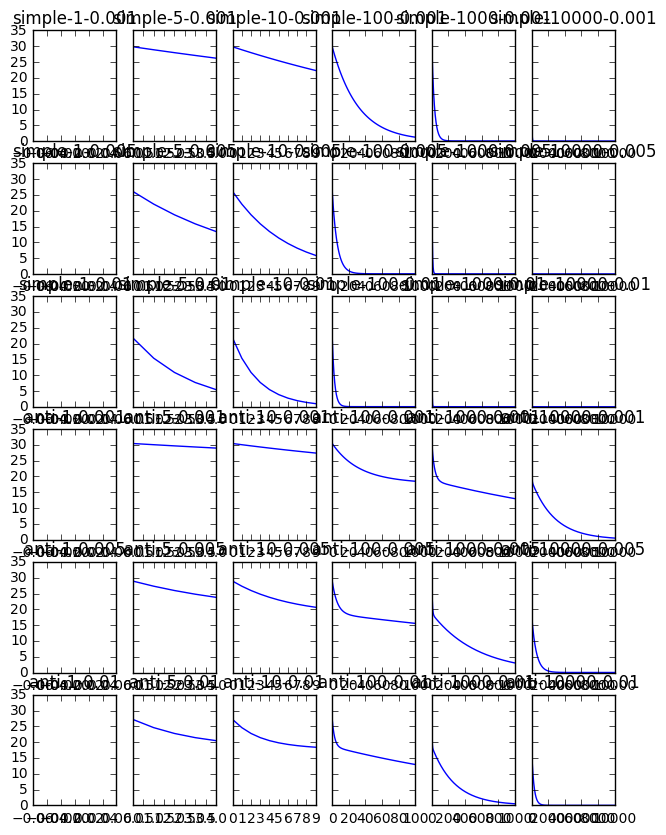

In [36]:
from numpy import arange

plt.close('all')
f, axarr = plt.subplots(len(alphas)*2, len(iterations), sharey=True)
f.set_size_inches(10,10)

i = 0
j = 0
for alpha in alphas:
    for iteration in iterations:
        axarr[i, j].plot(arange(int(iteration)), J_history["simple"][iteration][alpha])
        axarr[i, j].set_title("simple-" + iteration + "-" + alpha)
        j+=1
    i+=1
    j= 0

for alpha in alphas:
    for iteration in iterations:
        axarr[i, j].plot(arange(int(iteration)), J_history["anti"][iteration][alpha])
        axarr[i, j].set_title("anti-" + iteration + "-" + alpha)
        j+=1
    i+=1
    j= 0

plt.show()

# Library Implementations

## Statsmodel

Intercept a0:  -0.173333333333
Coefficients a1, a2:  x1    2.054286
dtype: float64
P-Values:  const    0.610970
x1       0.000014
dtype: float64
R-Squared:  0.993853153687
Conf. Interval:                0         1
const -1.046767  0.700101
x1     1.830009  2.278563

MAE:  0.229206349206
MSE:  0.076126984127
RMSE:  0.27591118884

Intercept a0:  14.2066666667
Coefficients a1, a2:  x1   -2.054286
dtype: float64
P-Values:  const    0.000001
x1       0.000014
dtype: float64
R-Squared:  0.993853153687
Conf. Interval:                 0          1
const  13.333233  15.080101
x1     -2.278563  -1.830009

MAE:  0.229206349206
MSE:  0.076126984127
RMSE:  0.27591118884


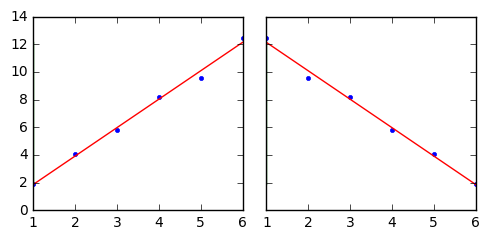

In [47]:
import statsmodels.api as sm

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

# create a linear model and fit it to the data
X_simple_1 = sm.add_constant(X_simple)
model_simple = sm.OLS(y_simple,X_simple_1)
fit_simple = model_simple.fit()

print('Intercept a0: ', fit_simple.params[0])
print('Coefficients a1, a2: ', fit_simple.params[1:2])
print('P-Values: ', fit_simple.pvalues)
print('R-Squared: ', fit_simple.rsquared)
print('Conf. Interval: ', fit_simple.conf_int())

print()
# calculate MAE, MSE, RMSE
y_pred = fit.predict(X_simple)
print('MAE: ', metrics.mean_absolute_error(y_simple, y_pred))
print('MSE: ', metrics.mean_squared_error(y_simple, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_simple, y_pred)))

axarr[0].plot(df_simple["x"], df_simple["y"], '.')
axarr[0].plot(X_simple, fit_simple.predict(X_simple))

X_anti_1 = sm.add_constant(X_anti)
model_anti = sm.OLS(y_anti, X_anti_1)
fit_anti = model_anti.fit()

print()
print('Intercept a0: ', fit_anti.params[0])
print('Coefficients a1, a2: ', fit_anti.params[1:2])
print('P-Values: ', fit_anti.pvalues)
print('R-Squared: ', fit_anti.rsquared)
print('Conf. Interval: ', fit_anti.conf_int())

print()
# calculate MAE, MSE, RMSE
y_pred = fit_anti.predict(X_anti)
print('MAE: ', metrics.mean_absolute_error(y_anti, y_pred))
print('MSE: ', metrics.mean_squared_error(y_anti, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_anti, y_pred)))

axarr[1].plot(df_anti["x"], df_anti["y"], '.')
axarr[1].plot(X_anti, fit_anti.predict(X_anti))

plt.tight_layout()
plt.show()

## SKLearn

Intercept a0:  -0.173333333333
Coefficients a1, a2:  [ 0.          2.05428571]
R-Squared:  0.993853153687

MAE:  0.229206349206
MSE:  0.076126984127
RMSE:  0.27591118884

Intercept a0:  14.2066666667
Coefficients a1, a2:  [ 0.         -2.05428571]
R-Squared:  0.993853153687

MAE:  0.229206349206
MSE:  0.076126984127
RMSE:  0.27591118884


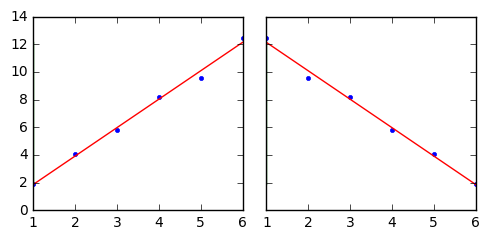

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

# create a linear model and fit it to the data
ols_simple = LinearRegression(fit_intercept=True)
model_simple = ols_simple.fit(X_simple, y_simple)

print('Intercept a0: ', model_simple.intercept_)
print('Coefficients a1, a2: ', model_simple.coef_)
print('R-Squared: ',model_simple.score(X_simple, y_simple))

print()
# calculate MAE, MSE, RMSE
y_pred = fit_simple.predict(X_simple)
print('MAE: ', metrics.mean_absolute_error(y_simple, y_pred))
print('MSE: ', metrics.mean_squared_error(y_simple, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_simple, y_pred)))

axarr[0].plot(df_simple["x"], df_simple["y"], '.')
axarr[0].plot(X_simple, fit_simple.predict(X_simple))

ols_anti= LinearRegression(fit_intercept=True)
model_anti = ols_anti.fit(X_anti, y_anti)

print()
print('Intercept a0: ', model_anti.intercept_)
print('Coefficients a1, a2: ', model_anti.coef_)
print('R-Squared: ',model_anti.score(X_anti, y_anti))

print()
# calculate MAE, MSE, RMSE
y_pred = fit_anti.predict(X_anti)
print('MAE: ', metrics.mean_absolute_error(y_anti, y_pred))
print('MSE: ', metrics.mean_squared_error(y_anti, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_anti, y_pred)))

axarr[1].plot(df_anti["x"], df_anti["y"], '.')
axarr[1].plot(X_anti, fit_anti.predict(X_anti))

plt.tight_layout()
plt.show()

## SciPy

Intercept a0:  2.05428571429
Coefficients a1, a2:  -0.173333333333
R-Squared:  0.996921839307

MAE:  0.229206349206
MSE:  0.076126984127
RMSE:  0.27591118884
Intercept a0:  -2.05428571429
Coefficients a1, a2:  14.2066666667
R-Squared:  -0.996921839307

MAE:  0.229206349206
MSE:  0.076126984127
RMSE:  0.27591118884


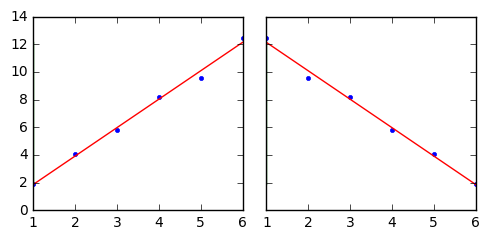

In [51]:
from scipy import stats

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

# create a linear model and fit it to the data
slope_simple, intercept_simple, r_value_simple, p_value_simple, std_err_simple = stats.linregress(X_simple[:,1], y_simple)

print('Intercept a0: ', slope_simple)
print('Coefficients a1, a2: ', intercept_simple)
print('R-Squared: ',r_value_simple)

print()
# calculate MAE, MSE, RMSE
y_pred = intercept_simple + (slope_simple*X_simple[:,1])
print('MAE: ', metrics.mean_absolute_error(y_simple, y_pred))
print('MSE: ', metrics.mean_squared_error(y_simple, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_simple, y_pred)))

axarr[0].plot(df_simple["x"], df_simple["y"], '.')
axarr[0].plot(X_simple, fit_simple.predict(X_simple))

# create a linear model and fit it to the data
slope_anti, intercept_anti, r_value_anti, p_value_anti, std_err_anti = stats.linregress(X_anti[:,1], y_anti)

print('Intercept a0: ', slope_anti)
print('Coefficients a1, a2: ', intercept_anti)
print('R-Squared: ',r_value_anti)

print()
# calculate MAE, MSE, RMSE
y_pred = intercept_anti + (slope_anti*X_anti[:,1])
print('MAE: ', metrics.mean_absolute_error(y_anti, y_pred))
print('MSE: ', metrics.mean_squared_error(y_anti, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_anti, y_pred)))

axarr[1].plot(df_anti["x"], df_anti["y"], '.')
axarr[1].plot(X_anti, fit_anti.predict(X_anti))

plt.tight_layout()
plt.show()